In [143]:
import PyQt5
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Constants

In [105]:
k = 9e+9 # electric force constant
eps= 1e-18 # very small number

# Electrostatic fields

In [106]:
# Potential field
def phi_field (n, charges):
    
    x,y = np.mgrid[0:n[0], 0:n[1]]
    phi = np.zeros(n)
    
    for i in range(charges.shape[0]):
        xi = np.tile(charges[i,1], np.prod(n)).reshape(x.shape)
        yi = np.tile(charges[i,2], np.prod(n)).reshape(y.shape)
        phi += charges[i,0]/(np.hypot((x-xi), (yi-y))+eps)
        phi[int(charges[i,1]), int(charges[i,2])] *= eps
        
        
    return phi
    
# E field
def E_field (n, charges):
    
    phi = phi_field (n, charges)
    Ex, Ey = np.gradient(phi)
    Ex = Ex*(-1)
    Ey = Ey*(-1)
    return Ex, Ey

# Plotting

In [208]:
def plot_field (n, charges, k = 1):

    plt.figure()
    plt.axes([0.025, 0.025, 0.95, 0.95])
    
    x,y = np.mgrid[0:n[0], 0:n[1]]

    # plot potential
    phi = phi_field (n, charges)
    pot = plt.contourf(x, y, phi, alpha=0.8,
                  cmap=plt.cm.winter)
    cb = plt.colorbar(pot)

    # plot E
    Ex, Ey = E_field(n, charges)
    norm = np.sqrt(Ex**2 + Ey**2 + eps)
    Exn = Ex/norm
    Eyn = Ey/norm
    plt.quiver(x[::k, ::k], y[::k, ::k], Exn[::k, ::k], Eyn[::k, ::k], color='Orange', linewidth=0.6)

    #plt.xlim(-1, n[0])
    plt.xticks(())
    #plt.ylim(-1, n[1])
    plt.yticks(())

    plt.show()

# Simulation

In [212]:
n = (200, 200)

In [213]:
charges = np.ones((4,3))
#charge 1
charges[0,0]  = 2                   # charge
charges[0,1:] = np.array([ n[0]/4,  n[0]/4]) # coordinates

#charge 2
charges[1,0]  = -10
charges[1,1:] = np.array([ 3*n[0]/4,  n[0]/4])

#charge 3
charges[2,0]  = 2
charges[2,1:] = np.array([ n[0]/4,  3*n[0]/4])

#charge 4
charges[3,0]  = 1
charges[3,1:] = np.array([ 3*n[0]/4,  3*n[0]/4])

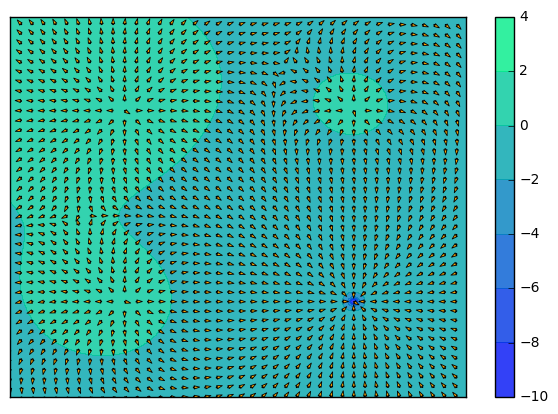

In [217]:
plot_field(n, charges, 5)